In [76]:
#let's load our csv's into dataframes
import pandas as pd;
timestamps = pd.read_csv("answer_timestamps.csv")
timestamps.set_index('Timestamp')
timestamps.index = pd.to_datetime(timestamps["Timestamp"])
comments = pd.read_csv("answer_comments.csv")

Y    276
N    169
Name: Q1 CLASSIFICATION, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


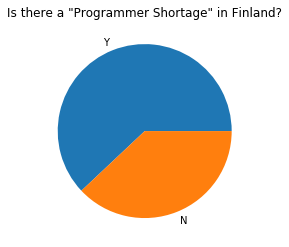

In [77]:
# let's print the main question results and plot it
answer = comments['Q1 CLASSIFICATION'].value_counts()
print(answer)
print(answer.plot(kind="pie", label ="", title="Is there a \"Programmer Shortage\" in Finland?"))


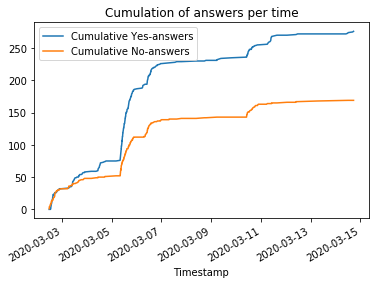

In [78]:
# let's print a time series graph on how the answers cumulated
timestamps['ones'] = 1
no_timeseries = timestamps.loc[timestamps['Q1 CLASSIFICATION'] == "N"]['ones'].cumsum()
yes_timeseries = timestamps.loc[timestamps['Q1 CLASSIFICATION'] == "Y"]['ones'].cumsum()
outer_joined_df = pd.merge(yes_timeseries, no_timeseries, on="Timestamp", how="outer").sort_index()
outer_joined_df.columns = ["Cumulative Yes-answers", "Cumulative No-answers"] # rename columns
outer_joined_df.iloc[0,0] = 0 # add a zero to first value for front fill to work properly
outer_joined_df.fillna(method='ffill', limit=None).plot(title = "Cumulation of answers per time")

PROGRAMMER     283
SPECIALIST      96
GOVERNANCE      28
RECRUITMENT     20
MANAGEMENT      11
OTHER            4
CUSTOMER         3
Name: Q2 CLASSIFICATION, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


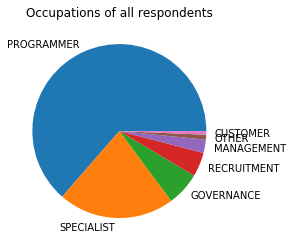

In [82]:
# who are the people who answered at all?
print(comments["Q2 CLASSIFICATION"].value_counts())
print(comments["Q2 CLASSIFICATION"].value_counts().plot(label = "", title="Occupations of all respondents",kind="pie"))


PROGRAMMER     182
SPECIALIST      49
RECRUITMENT     19
GOVERNANCE      18
MANAGEMENT       7
CUSTOMER         1
Name: Q2 CLASSIFICATION, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


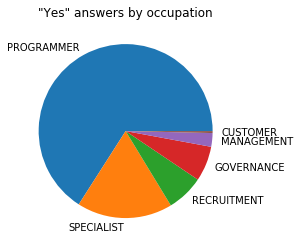

In [79]:
# let's see who were the ones who answered "Yes" to the main question?
print(comments[(comments["Q1 CLASSIFICATION"] == "Y")]["Q2 CLASSIFICATION"].value_counts())
print(comments[(comments["Q1 CLASSIFICATION"] == "Y")]["Q2 CLASSIFICATION"].value_counts().plot(label = "", title="\"Yes\" answers by occupation",kind="pie"))

PROGRAMMER     101
SPECIALIST      47
GOVERNANCE      10
MANAGEMENT       4
OTHER            4
CUSTOMER         2
RECRUITMENT      1
Name: Q2 CLASSIFICATION, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


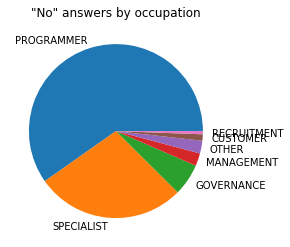

In [41]:
# let's see who were the ones who answered "No" to the main question?
print(comments[(comments["Q1 CLASSIFICATION"] == "N")]["Q2 CLASSIFICATION"].value_counts())
print(comments[(comments["Q1 CLASSIFICATION"] == "N")]["Q2 CLASSIFICATION"].value_counts().plot(label = "", title="\"No\" answers by occupation",kind="pie"))

             Yes -answers  No -answers
PROGRAMMER          182.0          101
SPECIALIST           49.0           47
RECRUITMENT          19.0            1
GOVERNANCE           18.0           10
MANAGEMENT            7.0            4
CUSTOMER              1.0            2
OTHER                 NaN            4


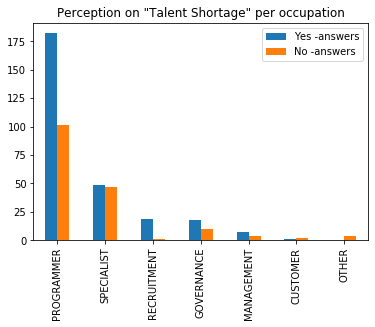

In [43]:
#let's draw comparisons in talent shortage perception between occupations
series1 = comments[(comments["Q1 CLASSIFICATION"] == "Y")]["Q2 CLASSIFICATION"].value_counts()
series2 = comments[(comments["Q1 CLASSIFICATION"] == "N")]["Q2 CLASSIFICATION"].value_counts()
frame = pd.concat([series1, series2], axis=1)
frame.columns =["Yes -answers", "No -answers"]
frame.plot(kind="bar", title="Perception on \"Talent Shortage\" per occupation")
print(frame.to_string())

Y    102
N     74
Name: Q1 CLASSIFICATION, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


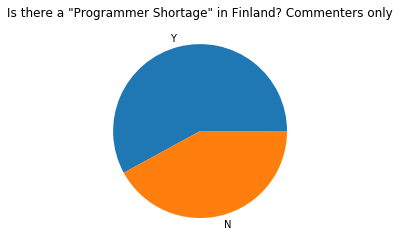

In [45]:
# we are mostly interested in the reasoning behind the answers. let's try to see whether the people leaving comments are a representative sample of the overall answers
commenter_answers = comments[comments["KEY_TAKEAWAYS_FROM_COMMENTS"].notnull()]
print(commenter_answers['Q1 CLASSIFICATION'].value_counts())
print(commenter_answers['Q1 CLASSIFICATION'].value_counts().plot(kind="pie", label ="", title="Is there a \"Programmer Shortage\" in Finland? Commenters only"))

AxesSubplot(0.260833,0.125;0.503333x0.755)


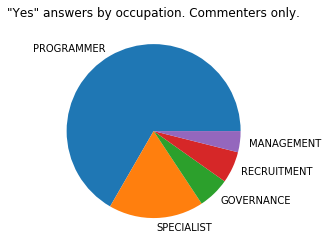

In [46]:
print(commenter_answers[(commenter_answers["Q1 CLASSIFICATION"] == "Y")]["Q2 CLASSIFICATION"].value_counts().plot(label = "", title="\"Yes\" answers by occupation. Commenters only.",kind="pie"))

AxesSubplot(0.260833,0.125;0.503333x0.755)


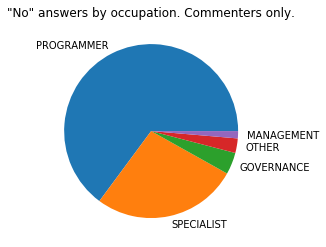

In [47]:
print(commenter_answers[(commenter_answers["Q1 CLASSIFICATION"] == "N")]["Q2 CLASSIFICATION"].value_counts().plot(label = "", title="\"No\" answers by occupation. Commenters only.",kind="pie"))

COMMENT(QUESTION_IS_BAD)                                               4.0
COMMENT(AVAILABLE_WORK_MIGHT_NOT_BE_VERY_INTERESTING)                  4.0
COMMENT(CANDIDATES_REPORT_TROUBLE_FINDING_WORK)                        5.0
COMMENT(SOFTWARE_QUALITY_ISSUES_LEAD_TO_UNNECESSARY_WORK)              6.0
COMMENT(NO_CANDIDATES_AVAILABLE_FOR_COMPANY)                           6.0
COMMENT(HEADHUNTERS_ARE_VERY_ACTIVE)                                   7.0
COMMENT(LOCATION_INEQUALITY_FOR_JOBS)                                  7.0
COMMENT(COMMITMENT_WORRIES)                                            8.0
COMMENT(INTERNATIONAL_LABOR)                                           9.0
COMMENT(TALENT_SHORTAGE_DISCOURSE_IS_NOT_WORKING)                     11.0
COMMENT(INEFFICIENT_MANAGEMENT_HIRING_AND_WORK_PRACTICES)             20.0
COMMENT(BEGINNERS_AND_LESS_SKILLED_PROGRAMMERS_EASY_TO_FIND)          35.0
COMMENT(TOO_HIGH_OR_SPECIFIC_SKILLS_REQUIRED_FOR_WORK)                40.0
COMMENT(LACK_OF_TRAINING_

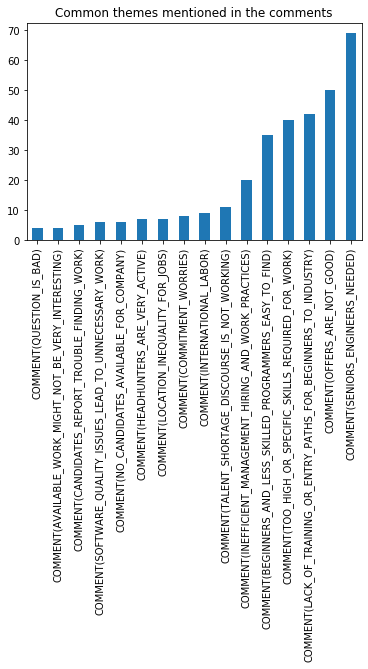

In [23]:
# the best for last. let's count the prevalence of shared remarks in comments
comments_df = comments.copy()
#print(comments_df.axes)
comments_df = comments_df.drop(['Kuvaako "koodaripula," "kohtaanto-ongelma," "osaamispula" tms. mielestäsi Suomen IT-asiantuntijamarkkinoiden nykytilaa totuudenmukaisesti tai hyödyllisesti?',
       'Mikä seuraavista kuvaa työnkuvaasi parhaiten?',
       'Q1 CLASSIFICATION', 'Q2 CLASSIFICATION', 'Q2 LITERAL TRANSLATION',
       'KEY_TAKEAWAYS_FROM_COMMENTS'], axis=1)
print(comments_df.sum(axis=0).sort_values())
print(comments_df.sum(axis=0).sort_values().plot(kind="bar", title="Common themes mentioned in the comments"))

                                                    Yes -answers  No -answers
COMMENT(QUESTION_IS_BAD)                                     4.0          0.0
COMMENT(AVAILABLE_WORK_MIGHT_NOT_BE_VERY_INTERE...           1.0          3.0
COMMENT(CANDIDATES_REPORT_TROUBLE_FINDING_WORK)              2.0          3.0
COMMENT(SOFTWARE_QUALITY_ISSUES_LEAD_TO_UNNECES...           2.0          4.0
COMMENT(NO_CANDIDATES_AVAILABLE_FOR_COMPANY)                 5.0          1.0
COMMENT(HEADHUNTERS_ARE_VERY_ACTIVE)                         5.0          2.0
COMMENT(LOCATION_INEQUALITY_FOR_JOBS)                        4.0          3.0
COMMENT(COMMITMENT_WORRIES)                                  8.0          0.0
COMMENT(INTERNATIONAL_LABOR)                                 4.0          5.0
COMMENT(TALENT_SHORTAGE_DISCOURSE_IS_NOT_WORKING)            7.0          4.0
COMMENT(INEFFICIENT_MANAGEMENT_HIRING_AND_WORK_...          13.0          7.0
COMMENT(BEGINNERS_AND_LESS_SKILLED_PROGRAMMERS_...          26.0

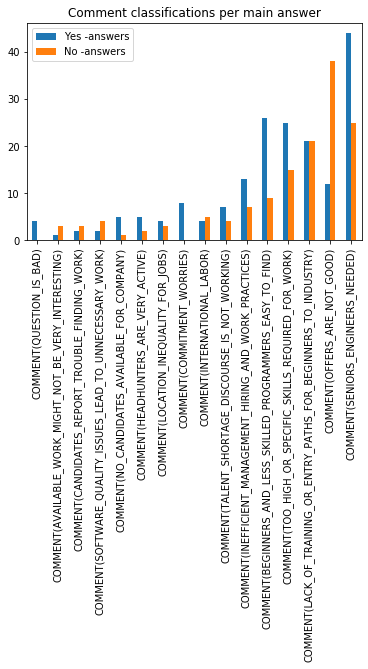

In [69]:
# i want to see whether the comments were correlated with Y/N:s?
comments_y = comments[(comments["Q1 CLASSIFICATION"] == "Y")].filter(regex="COMMENT\(.*")
comments_n = comments[(comments["Q1 CLASSIFICATION"] == "N")].filter(regex="COMMENT\(.*")
#plot it
frame = pd.concat([comments_y.sum(), comments_n.sum()], axis=1)
frame.columns =["Yes -answers", "No -answers"]
#shameless reindex from comments_df sorting results
#frame.sort_values(by="Yes -answers", inplace=True)
frame = frame.reindex(["COMMENT(QUESTION_IS_BAD)",
    "COMMENT(AVAILABLE_WORK_MIGHT_NOT_BE_VERY_INTERESTING)",
    "COMMENT(CANDIDATES_REPORT_TROUBLE_FINDING_WORK)",
    "COMMENT(SOFTWARE_QUALITY_ISSUES_LEAD_TO_UNNECESSARY_WORK)",
    "COMMENT(NO_CANDIDATES_AVAILABLE_FOR_COMPANY)",
    "COMMENT(HEADHUNTERS_ARE_VERY_ACTIVE)",
    "COMMENT(LOCATION_INEQUALITY_FOR_JOBS)",
    "COMMENT(COMMITMENT_WORRIES)",
    "COMMENT(INTERNATIONAL_LABOR)",
    "COMMENT(TALENT_SHORTAGE_DISCOURSE_IS_NOT_WORKING)",
    "COMMENT(INEFFICIENT_MANAGEMENT_HIRING_AND_WORK_PRACTICES)",
    "COMMENT(BEGINNERS_AND_LESS_SKILLED_PROGRAMMERS_EASY_TO_FIND)",
    "COMMENT(TOO_HIGH_OR_SPECIFIC_SKILLS_REQUIRED_FOR_WORK)",
    "COMMENT(LACK_OF_TRAINING_OR_ENTRY_PATHS_FOR_BEGINNERS_TO_INDUSTRY)",
    "COMMENT(OFFERS_ARE_NOT_GOOD)",
    "COMMENT(SENIORS_ENGINEERS_NEEDED)"]
)
print(frame)

frame.plot(kind="bar", title="Comment classifications per main answer")